In [1]:
import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import my_functions
import time
import copy

In [2]:
start_time =time.time()
n= 20

teams = list(range(1,n+1))
days = list(range(1,n))

result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
#result_df = pd.read_excel('C:/Users/ug033207/ispanya.xlsx', sheet_name= 'match results')
result_df = pd.DataFrame(result_df)

#Spanish old ratings
old_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#German old ratings
#old_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}
#new_ratings = {i: 500 for i in range(1, 19)}

p= 1
round_names = my_functions.round_generate(days, p)
round1 = round_names[0]
end_time = time.time()
print({start_time - end_time})

U_ij = np.zeros((n, n)) 
ratings_array = np.array(list(old_ratings.values()))
for i in range(n):
    for j in range(n):
        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))

output_ratings = {index: value for index, value in enumerate(ratings_array, start=1)}
print(output_ratings)
rating_df = pd.DataFrame(U_ij, columns=teams, index=teams)

ratingleritopla =[]

objective_values = []
objective_values2 = []

#random.seed(1)

{-0.2558324337005615}
{1: 1983, 2: 1876, 3: 1869, 4: 1840, 5: 1827, 6: 1779, 7: 1756, 8: 1739, 9: 1708, 10: 1698, 11: 1673, 12: 1669, 13: 1651, 14: 1648, 15: 1646, 16: 1631, 17: 1630, 18: 1617, 19: 1615, 20: 1610}


In [3]:
excel_file_path = 'C:/Users/ug033207/solution.xlsx'
with pd.ExcelWriter(excel_file_path) as writer:
    for r in round_names:
        if r==round1 :
    
            start1_time = time.time()
            solution_df, obj_value = my_functions.first_round_model(teams,days,rating_df,r)
            objective_values.append(obj_value)
            print(solution_df)
            new_ratings, rating_df = my_functions.Elo_rating(old_ratings, teams, solution_df, result_df,r)
            ratingleritopla.append(copy.deepcopy(new_ratings))
            end1_time = time.time()
            print({end1_time-start1_time})

            start2_time = time.time()
            sheet_name = f'Solution_days{len(r)}'.replace('[', '_').replace(']', '_')     
            solution_df.to_excel(writer, sheet_name=sheet_name)
            rating_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')
            
            end2_time = time.time()
            print({end2_time-start2_time})
        else:
            start3_time = time.time()
            solution_df, obj_value = my_functions.dynamic_model(teams, days, rating_df, solution_df, r)
            objective_values.append(obj_value)
            print(obj_value)
            new_ratings, rating_df = my_functions.Elo_rating(new_ratings, teams, solution_df, result_df,r)
            ratingleritopla.append(copy.deepcopy(new_ratings))
            print(solution_df)
            end3_time = time.time()
            print({end3_time-start3_time})

            start4_time = time.time()
            sheet_name = f'Solution_days{len(r)}'.replace('[', '_').replace(']', '_')
            solution_df.to_excel(writer, sheet_name=sheet_name)
            rating_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')
            end4_time =time.time()
            print({end4_time-start4_time})

Optimal solution found.
Team 2 vs Team 1 in Slot 1
Team 3 vs Team 4 in Slot 1
Team 5 vs Team 6 in Slot 1
Team 7 vs Team 8 in Slot 1
Team 9 vs Team 10 in Slot 1
Team 11 vs Team 12 in Slot 1
Team 13 vs Team 14 in Slot 1
Team 16 vs Team 15 in Slot 1
Team 18 vs Team 17 in Slot 1
Team 19 vs Team 20 in Slot 1
  Day Team 1 Team 2
0   1      2      1
1   1      3      4
2   1      5      6
3   1      7      8
4   1      9     10
5   1     11     12
6   1     13     14
7   1     16     15
8   1     18     17
9   1     19     20
  Team 1 Team 2 Result
0      2      1      1
1      3      4      4
2      5      6    tie
3      7      8     47
4      9     10     10
5     11     12     11
6     13     14    tie
7     16     15     15
8     18     17     17
9     19     20    tie
{1: 1990.0141010577806, 2: 1868.9858989422194, 3: 1858.1672459457047, 4: 1850.8327540542953, 5: 1825.6271721623266, 6: 1780.3728278376734, 7: 1755.5110907775868, 8: 1739.4889092224132, 9: 1697.71225631668, 10: 1708.2877436

In [4]:

result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
result_df2 = pd.DataFrame(result_df2)

excel_file_path = 'C:/Users/ug033207/solution2.xlsx'
with pd.ExcelWriter(excel_file_path) as writer:
    for r in round_names:
        if r == round1:
            start1_time = time.time()
            solution_df, obj_value = my_functions.first_round_model(teams,days,rating_df,r)
            objective_values2.append(obj_value)
            
            new_ratings, rating_df = my_functions.Elo_rating(new_ratings, teams, solution_df, result_df2,r)
            ratingleritopla.append(copy.deepcopy(new_ratings))
            end1_time = time.time()
            print({end1_time-start1_time})

            start2_time = time.time()
            sheet_name = f'Solution_days{len(r)}'.replace('[', '_').replace(']', '_')     
            solution_df.to_excel(writer, sheet_name=sheet_name)
            rating_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')
            end2_time = time.time()
            print({end2_time-start2_time})
        else:
            start3_time = time.time()
            solution_df, obj_value = my_functions.dynamic_model(teams, days, rating_df, solution_df, r)
            objective_values2.append(obj_value)
            
            new_ratings, rating_df = my_functions.Elo_rating(new_ratings, teams, solution_df, result_df2,r)
            ratingleritopla.append(copy.deepcopy(new_ratings))
            end3_time = time.time()
            print({end3_time-start3_time})

            start4_time = time.time()
            sheet_name = f'Solution_days{len(r)}'.replace('[', '_').replace(']', '_')
            solution_df.to_excel(writer, sheet_name=sheet_name)
            rating_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')
            end4_time =time.time()
            print({end4_time-start4_time})

Optimal solution found.
Team 2 vs Team 1 in Slot 1
Team 3 vs Team 4 in Slot 1
Team 6 vs Team 7 in Slot 1
Team 8 vs Team 5 in Slot 1
Team 12 vs Team 9 in Slot 1
Team 13 vs Team 11 in Slot 1
Team 14 vs Team 19 in Slot 1
Team 15 vs Team 17 in Slot 1
Team 18 vs Team 10 in Slot 1
Team 20 vs Team 16 in Slot 1
  Team 1 Team 2 Result
0      2      1      2
1      3      4    tie
2      6      7    tie
3      8      5      5
4     12      9    tie
5     13     11    tie
6     14     19     14
7     15     17    tie
8     18     10    tie
9     20     16     20
{1: 1969.7268860429674, 2: 1947.5388941856347, 3: 1846.8754128999183, 4: 1813.1970163374797, 5: 1770.1192981820818, 6: 1783.1392469691775, 7: 1801.170657290852, 8: 1731.7035890511445, 9: 1682.4656190746011, 10: 1672.2815253829403, 11: 1647.764942292925, 12: 1703.488099206651, 13: 1648.3791269617748, 14: 1667.8955258261442, 15: 1635.0802627037237, 16: 1555.4983975189673, 17: 1639.072957268531, 18: 1675.2895572694817, 19: 1641.7603267046238

[251.0, 347.0, 349.0, 434.0, 712.0, 726.0, 959.0, 1190.0, 1494.0, 1555.0, 1537.0, 1665.0, 1561.0, 1584.0, 1633.0, 1570.0, 1549.0, 1520.0, 1527.0]
[217.0, 490.0, 488.0, 710.0, 671.0, 754.0, 819.0, 1473.0, 1476.0, 1460.0, 1443.0, 1531.0, 1531.0, 1570.0, 1512.0, 1558.0, 1438.0, 1484.0, 1427.0]
[ 251.  347.  349.  434.  712.  726.  959. 1190. 1494. 1555. 1537. 1665.
 1561. 1584. 1633. 1570. 1549. 1520. 1527.  217.  490.  488.  710.  671.
  754.  819. 1473. 1476. 1460. 1443. 1531. 1531. 1570. 1512. 1558. 1438.
 1484. 1427.]
44215.0


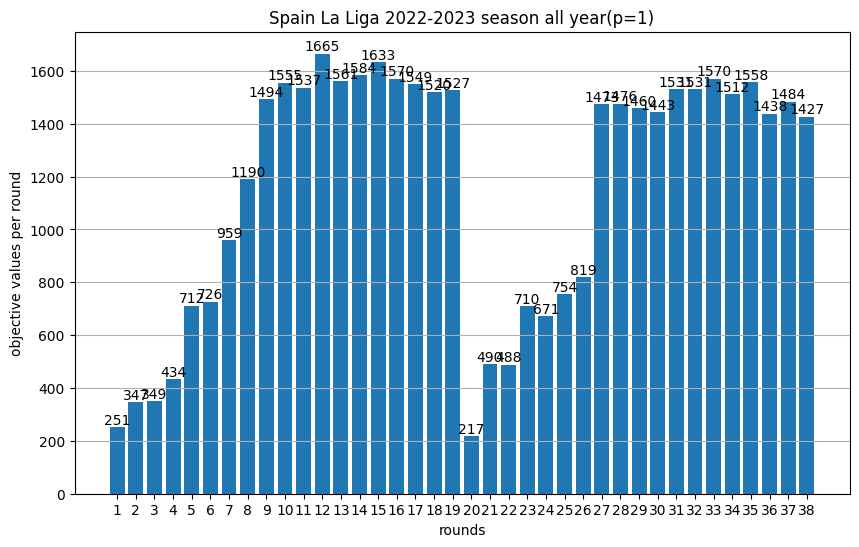

In [5]:
print(objective_values)
print(objective_values2)
objective_values3 = []
objective_values3 = objective_values + objective_values2
objective_values3 = np.array(objective_values3)
print(objective_values3)
print(sum(objective_values3))


plt.figure(figsize=(10,6))
bars = plt.bar(range(len(objective_values3)), objective_values3)
plt.bar_label(bars)
plt.xlabel('rounds')
plt.ylabel('objective values per round')
plt.title('Spain La Liga 2022-2023 season all year(p=1)')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(1,39)]  # New tick labels
plt.xticks(range(len(objective_values3)), new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
#plt.ylim(0,3000)
plt.show()

In [6]:

ratingleritopla = np.array(ratingleritopla)
print(ratingleritopla)

[{1: 1990.0141010577806, 2: 1868.9858989422194, 3: 1858.1672459457047, 4: 1850.8327540542953, 5: 1825.6271721623266, 6: 1780.3728278376734, 7: 1755.5110907775868, 8: 1739.4889092224132, 9: 1697.71225631668, 10: 1708.28774368332, 11: 1682.8848758317772, 12: 1659.1151241682228, 13: 1650.9136552048988, 14: 1648.0863447951012, 15: 1655.568533338977, 16: 1621.431466661023, 17: 1639.626004441409, 18: 1607.373995558591, 19: 1614.856098365819, 20: 1610.143901634181}
 {1: 1976.2095119693834, 2: 1878.6746136803624, 3: 1848.4785312075617, 4: 1864.6373431426925, 5: 1823.1974927357824, 6: 1789.658468405415, 7: 1746.2254502098451, 8: 1741.9185886489574, 9: 1697.285748901262, 10: 1716.8818166895014, 11: 1683.3113832471952, 12: 1650.5210511620414, 13: 1661.0476253515635, 14: 1637.8428847443245, 15: 1645.4345631923122, 16: 1621.2422349402632, 17: 1649.8694644921857, 18: 1607.4537181750343, 19: 1615.0453300865788, 20: 1610.0641790177378}
 {1: 1982.0697194147779, 2: 1888.27080825189, 3: 1856.801544954210